In [26]:
from graphstats import *

import numpy as np
import networkx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import _pickle as pickle
dir(graphstats)

['GaussianClustering',
 'GaussianMixture',
 'Graph',
 'NonParametricClustering',
 'OutOfCoreAdjacencySpectralEmbedding',
 'SpectralGraphClustering',
 'TruncatedSVD',
 'VertexNominationSeededGraphMatching',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'adj_spectral_embedding',
 'ase',
 'dimselect',
 'gclass',
 'gclust',
 'lap_spectral_embedding',
 'largest_connected_component',
 'lcc',
 'lse',
 'networkx',
 'nonpar',
 'norm',
 'np',
 'num_clust',
 'numclust',
 'omni',
 'oocase',
 'pass_to_ranks',
 'profile_likelihood',
 'ptr',
 'rankdata',
 'sgc',
 'vnsgm']

In [2]:
DS = pickle.load(open('datasets/DS01876.pkl', 'rb')) 
G_DS = DS['0']
G_DS = graphstats.largest_connected_component(G_DS)

G1_DS = G_DS.subgraph(np.arange(50))

print("All nodes: " + str(len(G1_DS)))

G1_DS = graphstats.largest_connected_component(G1_DS)
print("Connected nodes: " + str(len(G1_DS)))

All nodes: 50
Connected nodes: 48


In [3]:
ptrDS = graphstats.pass_to_ranks(G_DS)
ptrDS

array([[0.        , 0.37103916, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.37103916, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0584565 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0584565 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [4]:
A2 = graphstats.adj_spectral_embedding(ptrDS)
A2

(array([[ 2.23777356e-06,  2.46852620e-07],
        [ 8.64081171e-04,  6.27288087e-05],
        [ 1.35011143e-04, -4.75426731e-05],
        ...,
        [ 1.90733504e-12, -1.60477042e-11],
        [ 7.78150008e-16, -9.97028107e-15],
        [ 3.95733265e-07, -3.19739011e-06]]),
 array([143.27078591,  94.08433421]))

In [5]:
A10 = graphstats.adj_spectral_embedding(ptrDS, max_dim = 10, eig_scale = 0.5)
A10

(array([[ 2.23777502e-06,  2.47512816e-07, -5.12320249e-06, ...,
         -7.97445115e-05, -1.24621385e-05,  3.60085178e-05],
        [ 8.64081282e-04,  6.27799437e-05, -1.09178534e-03, ...,
         -8.85447133e-03, -1.32496305e-03,  3.08768422e-03],
        [ 1.35011481e-04, -4.74884406e-05, -1.17824948e-04, ...,
         -1.11290740e-03,  2.66449530e-03,  1.35412573e-02],
        ...,
        [ 1.90737437e-12, -1.60471257e-11, -3.43077434e-11, ...,
          2.57183682e-10,  1.33985782e-10,  2.91185793e-10],
        [ 7.78225478e-16, -9.96973944e-15, -2.53714195e-14, ...,
          3.69951577e-13,  2.16330026e-13,  4.58341446e-13],
        [ 3.95739832e-07, -3.19702530e-06, -5.00653364e-06, ...,
          1.66556320e-05,  2.31608580e-05,  2.45184921e-05]]),
 array([143.27078591,  94.08433421,  79.07211094,  76.36829945,
         54.3047676 ,  52.52949605,  48.86104599,  41.64536504,
         37.50702579,  35.2721677 ]))

In [6]:
A10_scale0 = graphstats.adj_spectral_embedding(ptrDS, max_dim = 10, eig_scale = 0)
A10_scale0

(array([[ 1.86955222e-07,  2.55175534e-08, -5.76142424e-07, ...,
         -1.23571257e-05, -2.03486808e-06,  6.06302236e-06],
        [ 7.21897895e-05,  6.47235402e-06, -1.22779424e-04, ...,
         -1.37207958e-03, -2.16345295e-04,  5.19896391e-04],
        [ 1.12795528e-05, -4.89586294e-06, -1.32502963e-05, ...,
         -1.72454962e-04,  4.35069507e-04,  2.28004236e-03],
        ...,
        [ 1.59351854e-13, -1.65439266e-12, -3.85816225e-12, ...,
          3.98529131e-11,  2.18777373e-11,  4.90291209e-11],
        [ 6.50169546e-17, -1.02783914e-15, -2.85320581e-15, ...,
          5.73273078e-14,  3.53232365e-14,  7.71743632e-14],
        [ 3.30621387e-08, -3.29600160e-07, -5.63022139e-07, ...,
          2.58093924e-06,  3.78179803e-06,  4.12836115e-06]]),
 array([143.27078591,  94.08433421,  79.07211094,  76.36829945,
         54.3047676 ,  52.52949605,  48.86104599,  41.64536504,
         37.50702579,  35.2721677 ]))

In [24]:
elbows = graphstats.profile_likelihood(A10[1], n_elbows = 2, threshold = 0)
print(elbows)

A10_elb2 = A10[0][:, :elbows[1]].copy()
A10_elb2.shape

[4 7]


(1759, 7)

In [31]:
len(A10_elb2[:,0])

1759

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


AttributeError: Unknown property projection

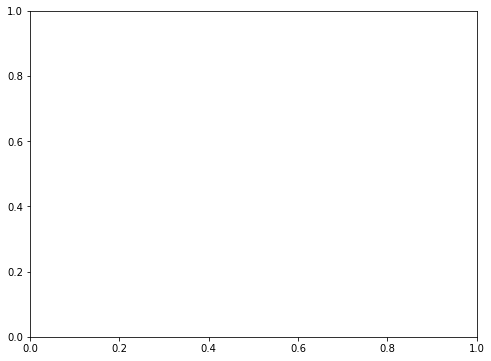

In [32]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
ax.scatter(A10_elb2[:,0], A10_elb2[:,1], A10_elb2[:,2], projection = '3d')